## 動的計画法/方策反復法

In [1]:
%load_ext lab_black

In [2]:
import os
import sys

sys.path.insert(0, os.path.abspath("../../"))

from collections import defaultdict
from common.gridworld import GridWorld

#### 方策評価の実装
- pi:方策
- V:価値関数
- env:環境
- gamma:割引率

In [3]:
def eval_onestep(pi, V, env, gamma=0.9):
    delta = 0

    for state in env.states():
        action_probs = pi[state]
        new_v = 0

        for action, action_prob in action_probs.items():
            next_state = env.next_state(state, action)
            if next_state is not None:
                r = env.reward(state, action, next_state)
                new_v += action_prob * (r + gamma * V[next_state])

        delta = max(delta, abs(V[state] - new_v))
        V[state] = new_v

    return V, delta

In [4]:
def policy_eval(pi, V, env, gamma, threshold=0.001):
    while True:
        V, delta = eval_onestep(pi, V, env, gamma)
        if delta < threshold:
            break
    return V

#### 方策の改善

In [5]:
def argmax(d):
    """d (dict)"""
    max_value = max(d.values())
    max_key = -1
    for key, value in d.items():
        if value == max_value:
            max_key = key
    return max_key

#### 価値関数をgreedy化する関数

In [6]:
def get_greedy_policy(V, env, gamma):
    pi = {}

    for state in env.states():
        action_values = {}

        for action in env.actions():
            next_state = env.next_state(state, action)
            value = 0

            if next_state is not None:
                r = env.reward(state, action, next_state)
                value += r + gamma * V[next_state]
            action_values[action] = value

        max_action = argmax(action_values)
        action_probs = {0: 0, 1: 0, 2: 0, 3: 0}
        action_probs[max_action] = 1.0
        pi[state] = action_probs

    return pi

#### 評価と改善を繰り返す
- env:環境
- gamma:割引率
- threshold:方策評価を行うときの更新をストップするための閾値
- is_render:方策の評価・改善を行う過程を描画するかどうかのフラグ

In [7]:
def policy_iter(env, gamma, threshold=0.001, is_render=True):
    pi = defaultdict(lambda: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25})
    V = defaultdict(lambda: 0)

    while True:
        V = policy_eval(pi, V, env, gamma, threshold)
        new_pi = get_greedy_policy(V, env, gamma)

        if is_render:
            env.render_v(V, pi)

        if new_pi == pi:
            break
        pi = new_pi

    return pi

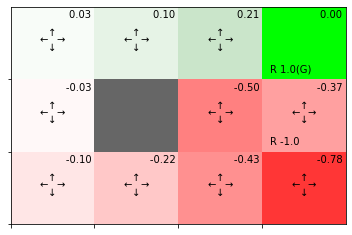

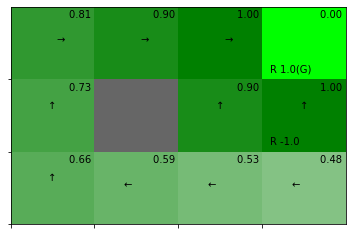

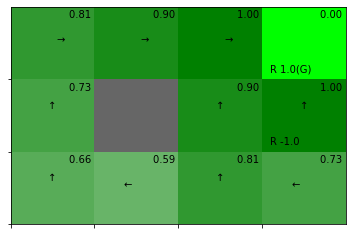

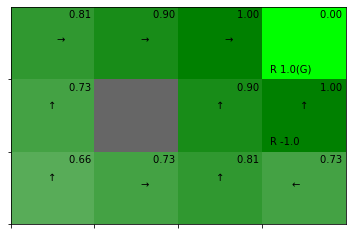

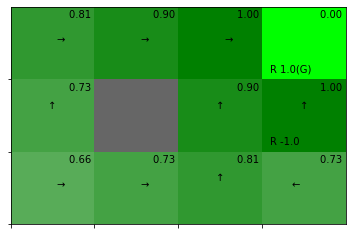

In [8]:
env = GridWorld()
gamma = 0.9
pi = policy_iter(env, gamma)